# 二项分布

In [8]:
import math
from typing import Union, Tuple, List

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import ipywidgets as widgets
from ipywidgets import interact, interactive, HBox, VBox, Output, Layout
%matplotlib inline

## 二项分布函数

In [9]:
def binomial_distribution(
        p: float, tests_nums: int, occurrences_nums: Union[int, np.ndarray, List[int], Tuple[int]]
        ) -> np.ndarray:
    """
    二项分布
    :params p: 发生概率
    :params test_nums: 重复试验次数
    :params occurrences_nums: 发生次数
    return:
    
    """
    
    if isinstance(occurrences_nums, int):
        occurrences_nums = np.array([occurrences_nums, ])
    else:
        occurrences_nums = np.array(occurrences_nums)
    # print(occurrences_nums)
    # 计算二项分布
    ret_p =  comb(tests_nums, occurrences_nums) * (p**occurrences_nums) * ((1-p)**(tests_nums - occurrences_nums))

    return ret_p

In [10]:
p = 0.5
test_nums = 2
occurrences_nums = np.arange(3)
# print(occurrences_nums)
ret = binomial_distribution(p, test_nums, occurrences_nums)
ret

array([0.25, 0.5 , 0.25])

In [11]:

# 创建一个输出部件，用于显示图表
output = Output()
# 创建一个输出部件，用于显示累计概率函数图
cum_prob_output = Output()

def plot_binomial_distribution(p, tests_nums):
    with output:
        output.clear_output(wait=True)
        occurrences = np.arange(0, tests_nums + 1)
        probabilities = binomial_distribution(p, tests_nums, occurrences)
        
        plt.figure(figsize=(10, 6))
        plt.bar(occurrences, probabilities, color='blue', alpha=0.7)
        plt.xlabel('Occurrences')
        plt.ylabel('Probability')
        plt.title(f'Binomial Distribution (p={p}, n={tests_nums})')
        plt.show()
        
    with cum_prob_output:
        cum_prob_output.clear_output(wait=True)
        cum_probs = np.cumsum(probabilities)
        
        plt.figure(figsize=(10, 6))
        plt.plot(occurrences, cum_probs, marker='o', linestyle='-', color='red')
        plt.xlabel('Occurrences')
        plt.ylabel('Cumulative Probability')
        plt.title(f'Cumulative Binomial Distribution (p={p}, n={tests_nums})')
        plt.grid(True)
        plt.show()
        
# 交互小部件
p_widget = widgets.FloatSlider(
    min=0, max=1, step=0.01, value=0.5, description='p',
    layout=Layout(width='100%')
)
tests_nums_widget = widgets.IntSlider(
    min=1, max=100, step=1, value=10, description='Tests',
    layout=Layout(width='100%')
)

# 使用interactive来创建交互部件，并将它们与绘图函数绑定
ui = interactive(plot_binomial_distribution, p=p_widget, tests_nums=tests_nums_widget)

# 显示部件和输出图表
display(VBox([HBox([output, cum_prob_output])]), ui)

interactive(children=(FloatSlider(value=0.5, description='p', layout=Layout(width='100%'), max=1.0, step=0.01)…

## 伯努利分布

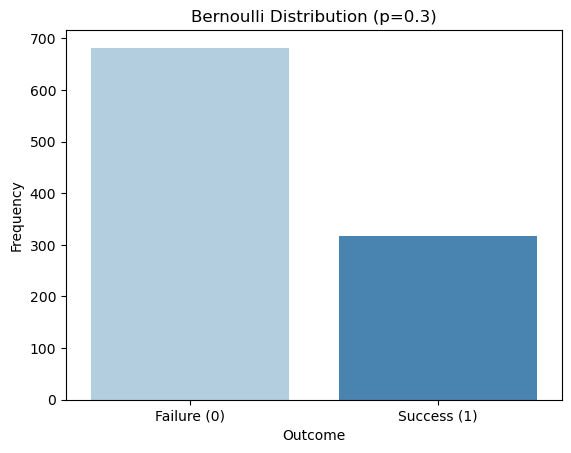

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 参数
p = 0.3  # 成功的概率
n = 1000  # 样本数量

# 生成伯努利分布的样本
samples = np.random.binomial(1, p, n)

# 计算成功和失败的频率
unique, counts = np.unique(samples, return_counts=True)
frequencies = dict(zip(unique, counts))

# 将频率转换为DataFrame以便使用seaborn
import pandas as pd
df = pd.DataFrame(list(frequencies.items()), columns=['Outcome', 'Frequency'])

# 可视化伯努利分布
sns.barplot(x='Outcome', y='Frequency', hue='Outcome', data=df, palette='Blues', dodge=False, legend=False)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title(f'Bernoulli Distribution (p={p})')
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.show()
